# `01-import` Notebook

Notebooks are numbered in the order they should be run (for data import projects) or according to a table of contents:

* `00-setup` - initial environment setup and proof of concept
* `01-import` - exploratory data analysis


In this notebook we will use OSMNx and the Neo4j Python driver to import data from OpenStreetMap into Neo4j.

![](../img/data_model.png)

In [18]:
# Uncomment to install dependencies
# pip install neo4j
# pip install osmnx

In [31]:
import neo4j
import osmnx as ox
import networkx as nx


In [32]:
# Update with your Neo4j AuraDB credentials
NEO4J_URI = "neo4j://34.89.156.145:7687"
NEO4J_USER = "neo4j"
NEO4J_PASSWORD = "Star@123"

driver = neo4j.GraphDatabase.driver(NEO4J_URI, auth=(NEO4J_USER, NEO4J_PASSWORD), max_connection_lifetime=200)

## OpenStreetMap Road Network With OSMNx

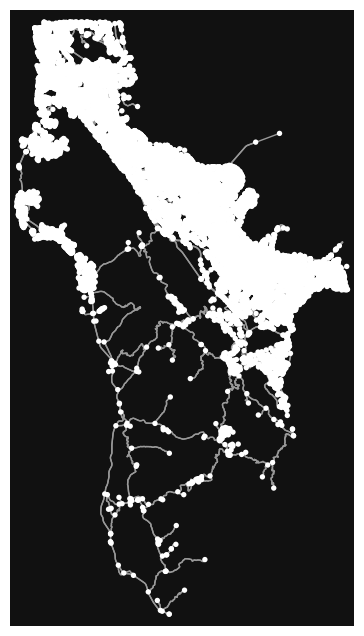

In [34]:
# Search OpenStreetMap and create a OSMNx graph

# G1 = ox.graph_from_place("San Mateo, CA, USA", network_type="bike")
G= ox.graph_from_place("San Mateo, CA, USA", network_type="drive")
# G3 = ox.graph_from_place("San Mateo, CA, USA", network_type="drive_service")
# G= nx.compose(G2, G3)
fig, ax = ox.plot_graph(G)

In [35]:
# Our road network graph can be represented as two GeoDataFrames

gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G)
gdf_nodes.reset_index(inplace=True)
gdf_relationships.reset_index(inplace=True)

,osmid,y,x,ref,highway,street_count,geometry
0,281266,37.560184,-122.302578,414B,motorway_junction,3,POINT (-122.30258 37.56018)
1,26028129,37.481955,-122.177346,406,motorway_junction,3,POINT (-122.17735 37.48195)
2,26028133,37.483360,-122.180471,NaN,NaN,3,POINT (-122.18047 37.48336)
3,26029745,37.484536,-122.184170,NaN,NaN,3,POINT (-122.18417 37.48454)
4,26029880,37.541234,-122.284734,414A,motorway_junction,3,POINT (-122.28473 37.54123)
...,...,...,...,...,...,...,...
18452,11829837291,37.545415,-122.304451,NaN,NaN,2,POINT (-122.30445 37.54541)
18453,11834834867,37.617608,-122.387253,NaN,NaN,3,POINT (-122.38725 37.61761)
18454,11834834868,37.617400,-122.387263,NaN,NaN,1,POINT (-122.38726 37.61740)
18455,11878873070,37.608975,-122.495644,NaN,NaN,4,POINT (-122.49564 37.60897)


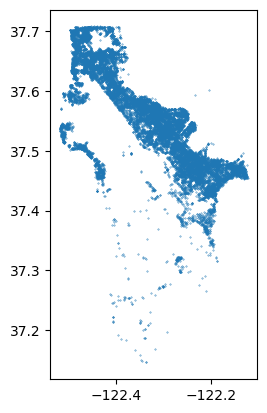

In [36]:
gdf_nodes.plot(markersize=0.1)
gdf_nodes

,u,v,key,osmid,oneway,lanes,ref,name,highway,maxspeed,reversed,length,geometry,bridge,junction,access,width,tunnel
0,281266,702274215,0,24054675,True,5,US 101,Bayshore Freeway,motorway,65 mph,False,1327.761,"LINESTRING (-122.30258 37.56018, -122.30222 37...",NaN,NaN,NaN,NaN,NaN
1,281266,65358141,0,"[512386104, 8920615]",True,3,NaN,NaN,motorway_link,65 mph,False,321.476,"LINESTRING (-122.30258 37.56018, -122.30161 37...",NaN,NaN,NaN,NaN,NaN
2,26028129,65388878,0,"[385243928, 392651465, 679545026, 8924237]",True,"[3, 4, 2, 1]",NaN,NaN,motorway_link,45 mph,False,377.868,"LINESTRING (-122.17735 37.48195, -122.17752 37...",NaN,NaN,NaN,NaN,NaN
3,26028129,26028133,0,395436903,True,4,US 101,Bayshore Freeway,motorway,65 mph,False,317.315,"LINESTRING (-122.17735 37.48195, -122.17744 37...",NaN,NaN,NaN,NaN,NaN
4,26028133,26029745,0,395436903,True,4,US 101,Bayshore Freeway,motorway,65 mph,False,351.773,"LINESTRING (-122.18047 37.48336, -122.18184 37...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46664,11878873070,65391007,0,8929644,False,NaN,NaN,Old County Road,residential,NaN,True,170.577,"LINESTRING (-122.49564 37.60897, -122.49555 37...",NaN,NaN,NaN,NaN,NaN
46665,11878873070,65443756,0,8932826,False,NaN,NaN,Rockaway Beach Avenue,unclassified,NaN,True,72.374,"LINESTRING (-122.49564 37.60897, -122.49570 37...",NaN,NaN,NaN,NaN,NaN
46666,11880513057,65501171,0,25795561,False,NaN,NaN,Spring Street,residential,NaN,True,152.309,"LINESTRING (-122.19065 37.47829, -122.19237 37...",NaN,NaN,NaN,NaN,NaN
46667,11880513057,4184236314,0,"[1279812750, 1279812751]",False,NaN,NaN,NaN,residential,NaN,True,28.156,"LINESTRING (-122.19065 37.47829, -122.19060 37...",NaN,NaN,NaN,NaN,NaN


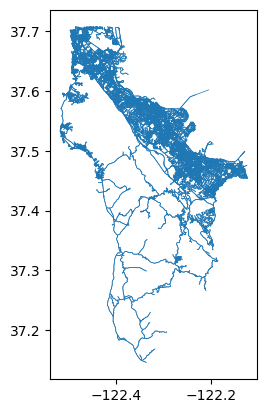

In [37]:
gdf_relationships.plot(markersize=0.01, linewidth=0.5)
gdf_relationships

## Neo4j Import

In [39]:
# First, define Cypher queries to create constraints and indexes

constraint_query = "CREATE CONSTRAINT IF NOT EXISTS FOR (i:Intersection) REQUIRE i.osmid IS UNIQUE"

rel_index_query = "CREATE INDEX IF NOT EXISTS FOR ()-[r:ROAD_SEGMENT]-() ON r.osmids"

address_constraint_query = "CREATE CONSTRAINT IF NOT EXISTS FOR (a:Address) REQUIRE a.id IS UNIQUE"

point_index_query = "CREATE POINT INDEX IF NOT EXISTS FOR (i:Intersection) ON i.location"

# Cypher query to import our road network nodes GeoDataFrame

node_query = '''
    UNWIND $rows AS row
    WITH row WHERE row.osmid IS NOT NULL
    MERGE (i:Intersection {osmid: row.osmid})
        SET i.location = 
         point({latitude: row.y, longitude: row.x }),
            i.ref = row.ref,
            i.highway = row.highway,
            i.street_count = toInteger(row.street_count)
    RETURN COUNT(*) as total
    '''

# Cypher query to import our road network relationships GeoDataFrame

rels_query = '''
    UNWIND $rows AS road
    MATCH (u:Intersection {osmid: road.u})
    MATCH (v:Intersection {osmid: road.v})
    MERGE (u)-[r:ROAD_SEGMENT {osmid: road.osmid}]->(v)
        SET r.oneway = road.oneway,
            r.lanes = road.lanes,
            r.ref = road.ref,
            r.name = road.name,
            r.highway = road.highway,
            r.max_speed = road.maxspeed,
            r.length = toFloat(road.length)
    RETURN COUNT(*) AS total
    '''

In [40]:
# Function to execute our constraint / index queries

def create_constraints(tx):
    results = tx.run(constraint_query)
    results = tx.run(rel_index_query)
    results = tx.run(address_constraint_query)
    results = tx.run(point_index_query)

In [41]:
# Function to batch our GeoDataFrames

def insert_data(tx, query, rows, batch_size=10000):
    total = 0
    batch = 0
    
    while batch * batch_size < len(rows):
        results = tx.run(query, parameters = {'rows': rows[batch*batch_size:(batch+1)*batch_size].to_dict('records')}).data()
        print(results)
        total += results[0]['total']
        batch += 1

In [42]:
# Run our constraints queries and nodes GeoDataFrame import

with driver.session() as session:
    session.execute_write(create_constraints)
    session.execute_write(insert_data, node_query, gdf_nodes.drop(columns=['geometry'])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 8457}]


In [43]:
# Run our relationships GeoDataFrame import

with driver.session() as session:
    session.execute_write(insert_data, rels_query, gdf_relationships.drop(columns=['geometry'])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 6669}]


In [ ]:
# Run our relationships GeoDataFrame import

with driver.session() as session:
    session.execute_write(insert_data, rels_query, gdf_relationships.drop(columns=['geometry'])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 3900}]


Transaction failed and will be retried in 0.8960437567357868s (There is not enough memory to perform the current task. Please try increasing 'server.memory.heap.max_size' in the neo4j configuration (normally in 'conf/neo4j.conf' or, if you are using Neo4j Desktop, found through the user interface) or if you are running an embedded installation increase the heap by using '-Xmx' command line flag, and then restart the database.)


[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]


AssertionError: 

In [ ]:
# Run our relationships GeoDataFrame import

with driver.session() as session:
    session.execute_write(insert_data, rels_query, gdf_relationships.drop(columns=['geometry'])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 3900}]


Transaction failed and will be retried in 0.8960437567357868s (There is not enough memory to perform the current task. Please try increasing 'server.memory.heap.max_size' in the neo4j configuration (normally in 'conf/neo4j.conf' or, if you are using Neo4j Desktop, found through the user interface) or if you are running an embedded installation increase the heap by using '-Xmx' command line flag, and then restart the database.)


[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]


AssertionError: 

In [ ]:
# Run our relationships GeoDataFrame import

with driver.session() as session:
    session.execute_write(insert_data, rels_query, gdf_relationships.drop(columns=['geometry'])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 3900}]


Transaction failed and will be retried in 0.8960437567357868s (There is not enough memory to perform the current task. Please try increasing 'server.memory.heap.max_size' in the neo4j configuration (normally in 'conf/neo4j.conf' or, if you are using Neo4j Desktop, found through the user interface) or if you are running an embedded installation increase the heap by using '-Xmx' command line flag, and then restart the database.)


[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]


AssertionError: 

In [ ]:
# Run our relationships GeoDataFrame import

with driver.session() as session:
    session.execute_write(insert_data, rels_query, gdf_relationships.drop(columns=['geometry'])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 3900}]


Transaction failed and will be retried in 0.8960437567357868s (There is not enough memory to perform the current task. Please try increasing 'server.memory.heap.max_size' in the neo4j configuration (normally in 'conf/neo4j.conf' or, if you are using Neo4j Desktop, found through the user interface) or if you are running an embedded installation increase the heap by using '-Xmx' command line flag, and then restart the database.)


[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]


AssertionError: 

In [ ]:
# Run our relationships GeoDataFrame import

with driver.session() as session:
    session.execute_write(insert_data, rels_query, gdf_relationships.drop(columns=['geometry'])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 3900}]


Transaction failed and will be retried in 0.8960437567357868s (There is not enough memory to perform the current task. Please try increasing 'server.memory.heap.max_size' in the neo4j configuration (normally in 'conf/neo4j.conf' or, if you are using Neo4j Desktop, found through the user interface) or if you are running an embedded installation increase the heap by using '-Xmx' command line flag, and then restart the database.)


[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]


AssertionError: 

In [ ]:
# Run our relationships GeoDataFrame import

with driver.session() as session:
    session.execute_write(insert_data, rels_query, gdf_relationships.drop(columns=['geometry'])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 3900}]


Transaction failed and will be retried in 0.8960437567357868s (There is not enough memory to perform the current task. Please try increasing 'server.memory.heap.max_size' in the neo4j configuration (normally in 'conf/neo4j.conf' or, if you are using Neo4j Desktop, found through the user interface) or if you are running an embedded installation increase the heap by using '-Xmx' command line flag, and then restart the database.)


[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]


AssertionError: 

In [ ]:
# Run our relationships GeoDataFrame import

with driver.session() as session:
    session.execute_write(insert_data, rels_query, gdf_relationships.drop(columns=['geometry'])) #FIXME: handle geometry

[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 3900}]


Transaction failed and will be retried in 0.8960437567357868s (There is not enough memory to perform the current task. Please try increasing 'server.memory.heap.max_size' in the neo4j configuration (normally in 'conf/neo4j.conf' or, if you are using Neo4j Desktop, found through the user interface) or if you are running an embedded installation increase the heap by using '-Xmx' command line flag, and then restart the database.)


[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]
[{'total': 10000}]


AssertionError: 

## Exploring The Road Network In Neo4j

Now let's use Neo4j Bloom to visualize and explore our road network.

![](../img/BostonGraphViz.png)

# Adding Addresses

We can use data from [OpenAddresses.io](https://openaddresses.io) to add addresses to our road network so that we can find routes between addresses.

![](../img/data_model_addresses.png)

Data from OpenAddresses is GeoJSON that looks like this:

```
{
  "type":"Feature",
  "properties":
    {
      "hash":"a98a4da3fa36d965",
      "number":"599",
      "street":"SKYLINE BLVD",
      "unit":"",
      "city":"DALY CITY",
      "district":"",
      "region":"",
      "postcode":" ",
      "id":"002011020"
    },
  "geometry":
    { "type":"Point",
      "coordinates":[-122.4995656,37.7033098]
    }
}
```

In [46]:
# We'll use apoc.load.json to import a JSON file of address data

add_addresses_query = """
CALL apoc.periodic.iterate(
  'CALL apoc.load.json("https://github.com/VindhyaKeshav/addresses/raw/main/source.geojson") YIELD value',
  'MERGE (a:Address {id: value.properties.id})
SET a.location = 
  point(
      {latitude: value.geometry.coordinates[1], longitude: value.geometry.coordinates[0]}),
    a.full_address = value.properties.number + " " + value.properties.street + " " + value.properties.city + ", CA " + value.properties.postcode

SET a += value.properties',
  {batchSize:10000, parallel:true})
"""

# Next, connect each address to the road network at the nearest intersection

near_intersection_query = """
CALL apoc.periodic.iterate(
  'MATCH (p:Address) WHERE NOT EXISTS ((p)-[:NEAREST_INTERSECTION]->(:Intersection)) RETURN p',
  'CALL {
  WITH p
  MATCH (i:Intersection)
  USING INDEX i:Intersection(location)
  WHERE point.distance(i.location, p.location) < 200

  WITH i
  ORDER BY point.distance(p.location, i.location) ASC 
  LIMIT 1
  RETURN i
}
WITH p, i

MERGE (p)-[r:NEAREST_INTERSECTION]->(i)
SET r.length = point.distance(p.location, i.location)
RETURN COUNT(p)',
  {batchSize:1000, parallel:false})
"""

# Create a full text index to enable search in our web app

full_text_query = "CREATE FULLTEXT INDEX search_index IF NOT EXISTS FOR (p:PointOfInterest|Address) ON EACH [p.name, p.full_address]"

In [48]:
# Transaction function to execute our address import queries

def enrich_addresses(tx):
    results = tx.run(add_addresses_query)        
    results = tx.run(near_intersection_query)


In [49]:
# Execute address import
with driver.session() as session:
    session.execute_write(enrich_addresses)

In [50]:
# Execute full text index query
with driver.session() as session:
    results = session.execute_write(lambda tx: tx.run(full_text_query))


```
MATCH (a:Address)-[:NEAREST_INTERSECTION]->(source:Intersection)
WHERE a.full_address CONTAINS "410 E 5TH AVE SAN MATEO, CA"
MATCH 
  (poi:Address)-[:NEAREST_INTERSECTION]->(dest:Intersection) 
WHERE poi.full_address CONTAINS "111 5TH AVE"
CALL apoc.algo.dijkstra(source, dest, "ROAD_SEGMENT", "length") 
YIELD weight, path
RETURN *
//WITH [ x in nodes(path) | {latitude: x.location.latitude, longitude: x.location.longitude}] AS route, weight AS totalDist
//RETURN *
```


```
CALL db.index.fulltext.queryNodes("search_index", $searchString) 
YIELD node, score
RETURN coalesce(node.name, node.full_address) AS value, score, labels(node)[0] AS label, node.id AS id
ORDER BY score DESC LIMIT 25
```

```
MATCH (to {id: $dest})-[:NEAREST_INTERSECTION]->(source:Intersection) 
MATCH (from {id: $source})-[:NEAREST_INTERSECTION]->(target:Intersection)
CALL apoc.algo.dijkstra(source, target, 'ROAD_SEGMENT', 'length')
YIELD path, weight
RETURN [n in nodes(path) | [n.location.latitude, n.location.longitude]] AS route
```
